In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t

# Exercise 3
#### Continous random variables
---


### 1. Generate values from distributions

#### a) Exponential Distribution

First let's initialize globaly used parameters like number of random numbers to simulate and arrays of uniformly distributed random numbers.

In [128]:
num_of_samples = 10_000
np.random.seed(543)
U1 = np.random.uniform(size = num_of_samples)
U2 = np.random.uniform(size = num_of_samples)

First we have created function that generates simulated values from exponential distribution. Next we choose arbitrary value of lamba (λ = 3) and plot a histogram of simulated values in comparison to theoretical exponential distribution. We can see the generated values fit the real distribution quite well.

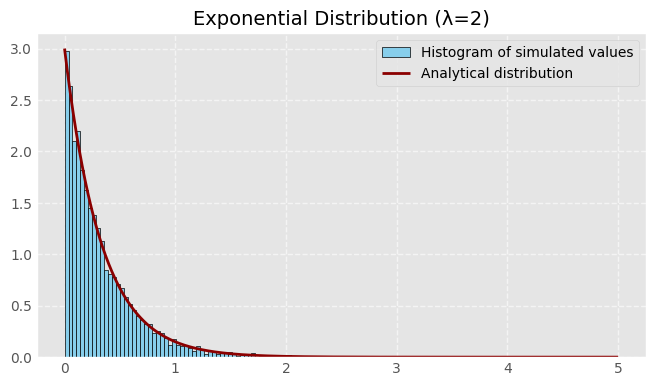

In [40]:
def exponential(λ, U):
    exp = -np.log(U)/λ
    return exp

λ = 3
exp = exponential(λ, U1)
x_axis = np.linspace(0, 5, num_of_samples)

plt.style.use('ggplot')
plt.figure(figsize=(7, 4))
plt.hist(exp, bins=100, density=True, color='skyblue', edgecolor='black', label='Histogram of simulated values')
plt.plot(x_axis, λ * np.exp(-λ * x_axis), color='darkred', linewidth=2, label='Analytical distribution')
plt.title('Exponential Distribution (λ=2)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Next we performed Kolmogorov Smirnov test to validate the distribution. We have visualized the results on the histogram. The histogram represents the p-values received from 10 000 K-S tests.

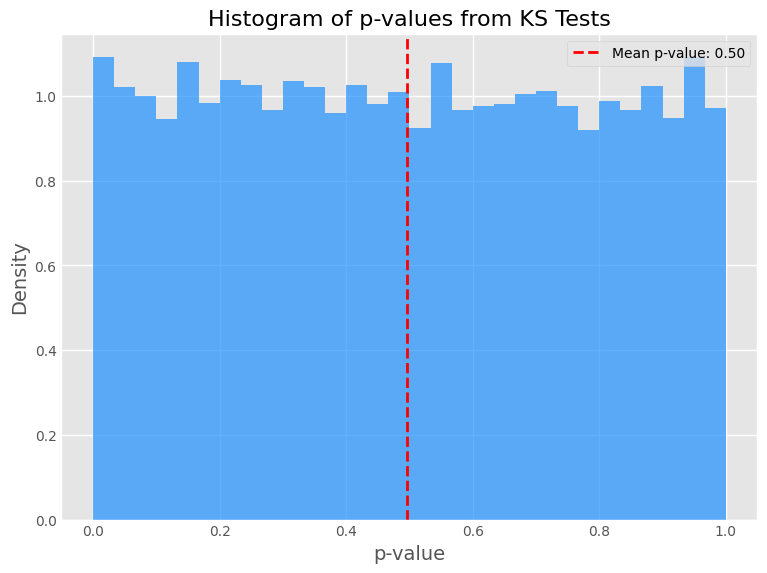

In [46]:
p_values = []
λ = 2

for i in range(num_of_samples):
    U = np.random.uniform(size = num_of_samples)
    exp = exponential(λ, U)
    p_values.append(stats.kstest(exp, cdf = (lambda x: 1 - np.exp(-λ * x)))[1])

plt.figure(figsize=(8, 6))
plt.hist(p_values, bins=30, density=True, alpha=0.7, color='dodgerblue')
plt.axvline(x=np.mean(p_values), color='red', linestyle='dashed', linewidth=2, label=f'Mean p-value: {np.mean(p_values):.2f}')
plt.grid(True)
plt.title('Histogram of p-values from KS Tests', fontsize=16)
plt.xlabel('p-value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

We can see that p-values are uniformly distributed which means that our function for simulating random values from exponential distribution is working properly.

#### b) Normal Distribution

We have created a function that generates values from the Normal Distribution using the Box Muller method.
Next, we sampled 10 000 values and created a histogram showing the fit of our values to real Gaussian distribution.

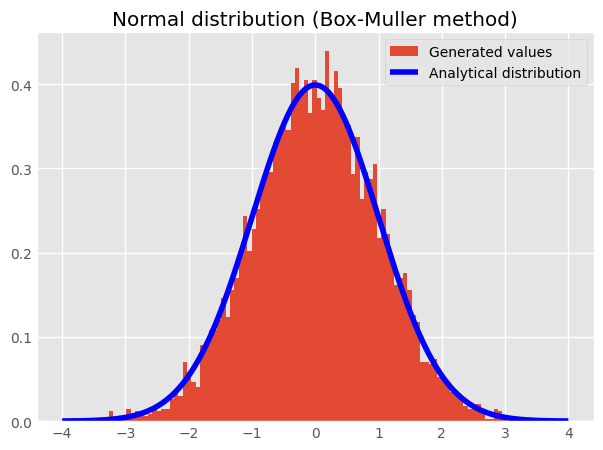

In [59]:
def normal_dist(U1, U2):
    r = np.sqrt(-2*np.log(U1))
    z1 = r * np.cos(2*np.pi*U2)
    z2 = r * np.sin(2*np.pi*U2)
    z = np.append(z1, z2)
    return z

u1, u2 = np.array_split(U1, 2)
generated_values = normal_dist(u1, u2)
x_axis = np.linspace(-4, 4, num_of_samples)

plt.figure()
plt.hist(generated_values, bins = 100, density=True, label = 'Generated values')
plt.plot(x_axis, stats.norm.pdf(x_axis), color = 'blue', label = 'Analytical distribution')
plt.title('Normal distribution (Box-Muller method)')
plt.legend()
plt.show()

Once again we performed Kolmogorov Smirnov tests to check the fit of our simulated values distribution to real distribution. Since the p-values are uniformly distributed we can confirm that the simulated values distribution maps to real distribution.

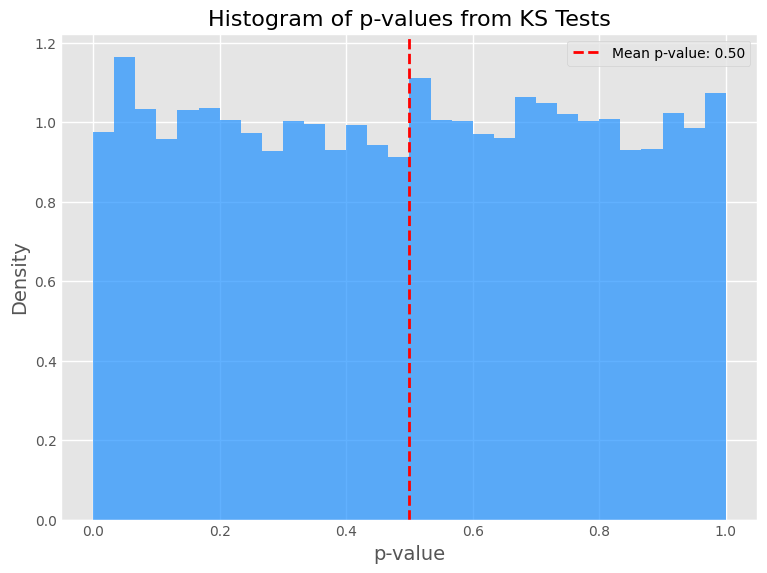

In [61]:
p_values = []

for i in range(num_of_samples):
    U = np.random.uniform(size = num_of_samples)
    u1, u2 = np.array_split(U, 2)
    norm = normal_dist(u1, u2)
    p_values.append(stats.kstest(norm, cdf = 'norm')[1])

plt.figure(figsize=(8, 6))
plt.hist(p_values, bins=30, density=True, alpha=0.7, color='dodgerblue')
plt.axvline(x=np.mean(p_values), color='red', linestyle='dashed', linewidth=2, label=f'Mean p-value: {np.mean(p_values):.2f}')
plt.grid(True)
plt.title('Histogram of p-values from KS Tests', fontsize=16)
plt.xlabel('p-value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

#### c) Pareto Distribution

We have created a function that generates values from the Pareto Distribution.
Next, for several different values of "k" parameter, we sampled 10 000 values and created a histogram showing the fit of our values to real Pareto distribution.

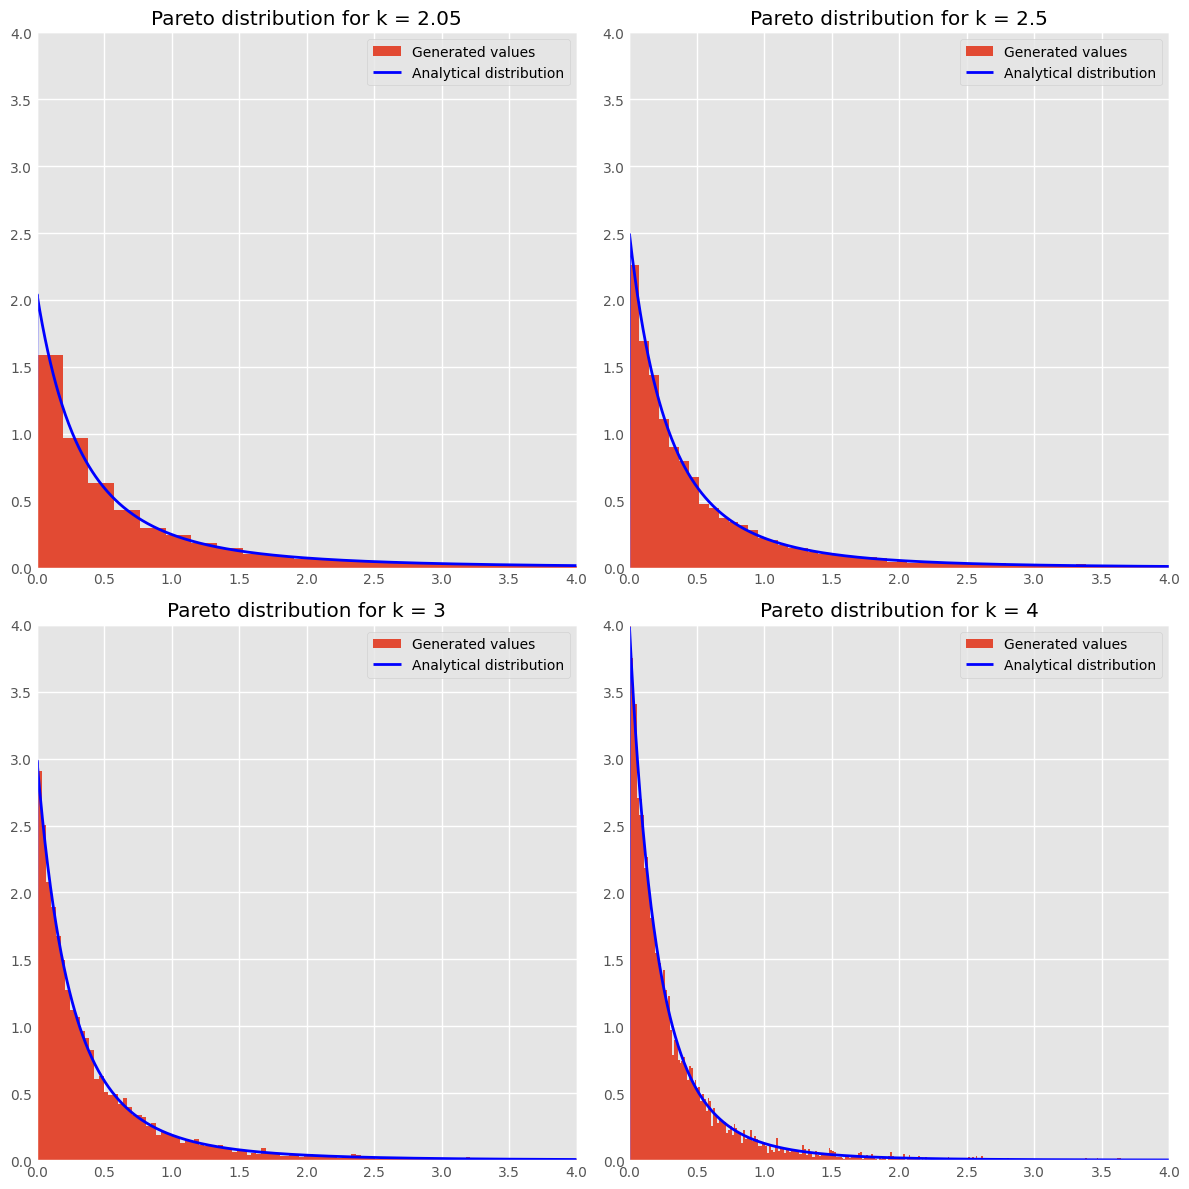

In [86]:
def pareto(beta, U, k):
    par = beta*(U**(-1/k)-1)
    return par

beta = 1
k_values = [2.05, 2.5, 3, 4]

fig, axs = plt.subplots(2,2, figsize = (12,12))
axs = axs.flatten()

for i, k in enumerate(k_values):
    generated_values = pareto(beta, U1, k)
    axs[i].hist(generated_values, bins = 1000, density = True, label = 'Generated values')
    x_axis = np.linspace(0,5,1000)
    axs[i].plot(x_axis-1, stats.pareto.pdf(x_axis, k), color = 'blue', linewidth = '2', label = 'Analytical distribution')
    axs[i].set_xlim([0,4])
    axs[i].set_ylim([0,4])
    axs[i].set_title('Pareto distribution for k = {}'.format(k))
    axs[i].legend()

fig.tight_layout()

Once again we performed Kolmogorov Smirnov tests to check the fit of our simulated values distribution to real distribution. Since the p-values are uniformly distributed we can confirm that the simulated values distribution maps to real distribution.

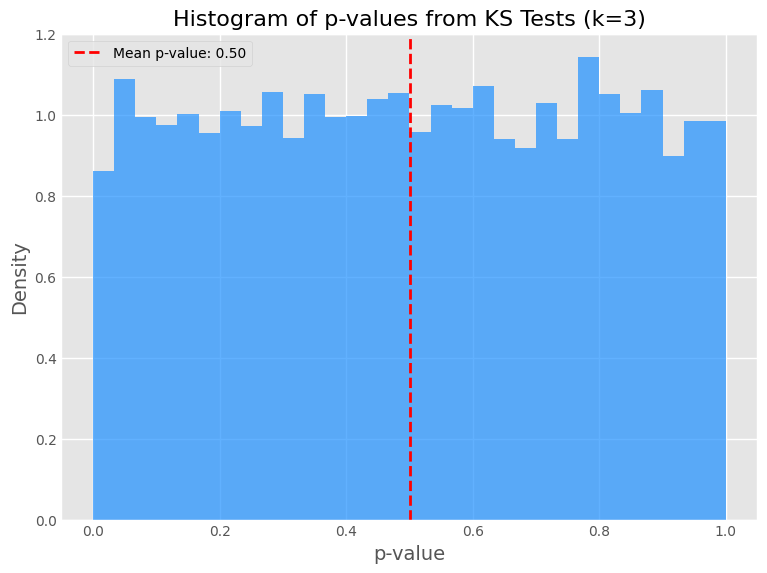

In [89]:
p_values = []
k = 3

for i in range(num_of_samples):
    U = np.random.uniform(size = num_of_samples)
    par = pareto(beta, U, k)
    p_values.append(stats.kstest(par, cdf = (lambda x: 1 - (1 + x/beta)**(-k)))[1])

plt.figure(figsize=(8, 6))
plt.hist(p_values, bins=30, density=True, alpha=0.7, color='dodgerblue')
plt.axvline(x=np.mean(p_values), color='red', linestyle='dashed', linewidth=2, label=f'Mean p-value: {np.mean(p_values):.2f}')
plt.grid(True)
plt.title('Histogram of p-values from KS Tests (k=3)', fontsize=16)
plt.xlabel('p-value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

### 2. Pareto Distribution - comparison of mean and variance between simulated and analytic distribution

We have calculated mean and variance for simulated and analytical pareto distributions for different values of "k" parameter.

In [106]:
k_values = [2.00000001, 2.5, 3, 4]
beta = 1

for k in k_values:
    par = beta*(U1**(-1/k))
    E = beta*k/(k-1)
    V = (beta**2) * k / ((k-1)**2 * (k-2))
    E_simulated = np.mean(par)
    V_simulated = np.std(par)**2
    print('\n')
    print(f'k = {k}')
    print('simulated mean = {:.4f}'.format(E_simulated))
    print('analytical mean = {:.4f}'.format(E))
    print('simulated variance = {:.4f}'.format(V_simulated))
    print('analytical variance = {:.4f}'.format(V))



k = 2.00000001
simulated mean = 1.9964
analytical mean = 2.0000
simulated variance = 11.2153
analytical variance = 199999998.2155


k = 2.5
simulated mean = 1.6614
analytical mean = 1.6667
simulated variance = 2.1358
analytical variance = 2.2222


k = 3
simulated mean = 1.4952
analytical mean = 1.5000
simulated variance = 0.7765
analytical variance = 0.7500


k = 4
simulated mean = 1.3298
analytical mean = 1.3333
simulated variance = 0.2280
analytical variance = 0.2222


We have observed that while the mean is almost the same for both simulated and analytical distribution for every value of "k", the analytical variance explodes when value of "k" is very close to 2. 
Looking at the variance formula, notice the term (k−2) in the denominator. As "k" approaches 2, the value of 
(k−2) approaches zero, making the denominator very small. Mathematically, dividing by a smaller number results in a larger result. Therefore, as 
k gets closer to 2, the variance increases sharply, approaching infinity when 
k is exactly 2. In case of simulated variance, we are working with finite sample so the variance can explode as much, although we still can observe significant increase.

Mean would behave the same with values very close to 1.

Increasing "beta" parameter, increases all the values.

### 3. Normal Distribution: Confidence intervals for the mean and variance

We generated one hundred Confidence Intervals with confidence level of 95%, each based on ten observations from the simulated normal distribution.

In [126]:
num_of_observations = 10
confidence_level = 0.95
confidence_intervals = np.zeros((100,4)) # arrays of [upper bound, lower bound, mean, standard deviation]
deg_of_freedom = num_of_observations - 1
critic_t_val = np.abs(t.ppf((1-confidence_level)/2,deg_of_freedom ) ) # t is a - Student’s t continuous random variable (from scipy.stats library)

for i in range(100):
    u1 = np.random.rand(num_of_observations)
    u2 = np.random.rand(num_of_observations)
    x1 = np.sqrt(-2*np.log(u1)) * np.cos(2*np.pi*u2)
    mean = np.mean(x1) 
    std_dev = np.std(x1)
    error_margin = critic_t_val * std_dev/np.sqrt(num_of_observations)
    confidence_intervals[i,:] = [mean+error_margin, mean-error_margin, mean, std_dev]

We can inspect the average width of confidence interval and what percent of all intervals do not cover the true mean = 0.

In [127]:
avg_width = np.mean(np.array(confidence_intervals[:,0]-np.array(confidence_intervals[:,1])))
print('The average width of the confidence interval is: ', avg_width)

not_covered_means = np.sum(np.logical_or(confidence_intervals[:100,0] < 0, confidence_intervals[:100,1] > 0))
print('The percent of all intervals that do not cover the true mean is: ', not_covered_means, "%")

The average width of the confidence interval is:  1.3382545983376897
The percent of all intervals that do not cover the true mean is:  4 %


Since the confidence level is 95% we should get that only 5% of all generated intervals don't cover the mean. Indeed that is our result, only 4% is not covered. It's important to keep in mind that since those results are based on random numbers, and only 10 samples which is very little, the results will not always fit the theory. It is not uncommon that we received more than 5% of intervals not covering the mean. 

### 4. Pareto Distribution: simulation using Composition

Since the Pareto distribution can easily be generalised with gamma distributions, we used the formulas for composition methods for gamma distribution (slides 21 and 22) and achieved following results.

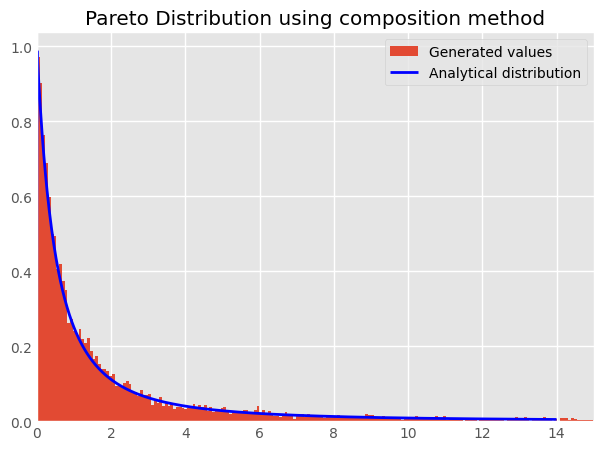

In [156]:
λ = 1

Y = -np.log(U1)/λ
X = -np.log(U2)/Y

composition_pareto_values = np.array(X)
composition_pareto_values = composition_pareto_values[composition_pareto_values < 15] # limit the range for visibility

x = np.linspace(0,15,1000)
plt.hist(composition_pareto_values, bins = 200, density = True, label = 'Generated values')
plt.plot(x-1, stats.pareto.pdf(x, 1), color = 'blue', linewidth = '2', label = 'Analytical distribution')
plt.title('Pareto Distribution using composition method')
plt.xlim([0,15])
plt.legend()
plt.show()